In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')   # follow the link → copy auth code → paste
import pandas as pd
current_time = datetime.now()
print(current_time.strftime("%Y-%m-%d %H:%M:%S"))

kmeans_ws_path = '/content/drive/MyDrive/kmeans_ws.csv'
#ws_char_path  = '/content/drive/MyDrive/ws_charateristics_202506191550.csv'
site_amp3_path  = '/content/drive/MyDrive/site_amp3_202506191536.csv'

kmeans_ws_df  = pd.read_csv(kmeans_ws_path)
#ws_char_df    = pd.read_csv(ws_char_path)
site_amp3_df  = pd.read_csv(site_amp3_path)

# 3️⃣ (Optional) sanity‑check
print(kmeans_ws_df.head())
#print(ws_char_df.head())
print(site_amp3_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2025-06-20 23:26:17
    site_no  drain_area_va   alt_va                        labels  \
0  12305000        11740.0  1794.75   Low-Elevation Large Streams   
1  12322000        13700.0  1700.00   Low-Elevation Large Streams   
2  13092747          259.0  3630.00  Mid-Elevation Medium Streams   
3  13150430           70.0  4834.45  Mid-Elevation Medium Streams   
4  13154500        35800.0  2495.13   Low-Elevation Large Streams   

   drain_area_km2        alt_m  
0    30406.309266   547.039800  
1    35482.660728   518.160000  
2      670.803586  1106.424000  
3      181.298266  1473.540360  
4    92721.113434   760.515624  
   Unnamed: 0      site       amp       ph_l   site_no  dec_lat_va  \
0           0  12305000  0.501713  28.067854  12305000   48.616883   
1           1  12322000  0.595400  22.359741  12322000   48.996389   
2           2  13092747  0.4

In [2]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'

In [3]:
merged_df = pd.merge(
    kmeans_ws_df[['site_no', 'labels']],
#    ws_char_df[['site_no', 'dam_and_diversion']],
    site_amp3_df[['site_no','dam_and_diversion','amp'  ,'ph_l' ]],
    on='site_no',
    how='inner'  # or 'left', 'right', 'outer' depending on your needs
)

print(merged_df)

merged_df.to_csv(reg_kmean_pasta_path, index=False)


     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

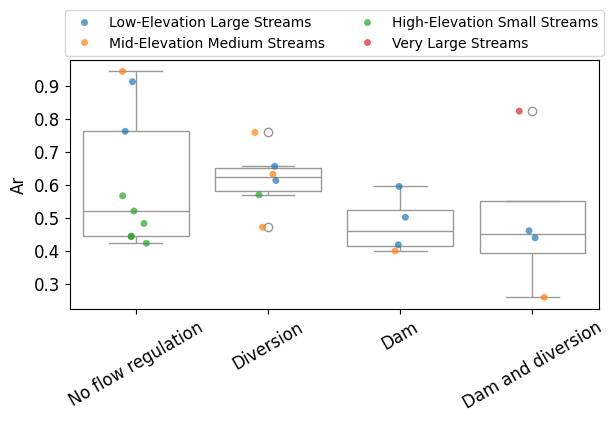

In [4]:
df = merged_df
x = "dam_and_diversion"
y = "amp"
ylabel = "Ar"
fontsize = 12
png = 'dam_and_diversion_Ar_labels.png'

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
           )

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
#              color='black',
              alpha=0.7, jitter=True
             # , dodge=True
             )

# Remove the legend title
ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2
         )

plt.xticks(rotation= 30 , fontsize= fontsize )

plt.yticks(  fontsize= fontsize )

plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()

plt.savefig( png
           # , dpi=300, bbox_inches='tight'
           )

# Save as EPS
plt.savefig('FIG_Ar.eps', format='eps', dpi=500)

# Save with higher DPI, specific quality, and tight bounding box
plt.savefig('FIG_Ar.jpg', dpi=400
             #, bbox_inches='tight'
             )


plt.show()